# Progetto d'esame di Data Analysis in Experimental Physics with Machine Learning

Gruppo composto dagli studenti Luca Attinà, Sharis Feriotto e Matteo Marchisio Caprioglio

Dataset ipotesi: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [3]:
%pip install -c conda-forge kagglehub


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'

[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# Prova import dataset
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Utente\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2


In [41]:
train_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
val_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = path + "/test"


In [42]:
train_path


'C:\\Users\\Utente\\.cache\\kagglehub\\datasets\\vipoooool\\new-plant-diseases-dataset\\versions\\2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [43]:
%ls "{train_path}"
%ls "{val_path}"


 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 9CA8-B290

 Directory di C:\Users\Utente\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train

10/07/2025  11:43    <DIR>          .
10/07/2025  11:43    <DIR>          ..
10/07/2025  11:42    <DIR>          Apple___Apple_scab
10/07/2025  11:42    <DIR>          Apple___Black_rot
10/07/2025  11:42    <DIR>          Apple___Cedar_apple_rust
10/07/2025  11:42    <DIR>          Apple___healthy
10/07/2025  11:42    <DIR>          Blueberry___healthy
10/07/2025  11:42    <DIR>          Cherry_(including_sour)___healthy
10/07/2025  11:42    <DIR>          Cherry_(including_sour)___Powdery_mildew
10/07/2025  11:42    <DIR>          Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
10/07/2025  11:42    <DIR>          Corn_(maize)___Common_rust_
10/07/2025  11:42    <DIR>          Corn_(maize)___healthy
10/07/2025  11:42  

 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 9CA8-B290

 Directory di C:\Users\Utente\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid

10/07/2025  11:44    <DIR>          .
10/07/2025  11:44    <DIR>          ..
10/07/2025  11:43    <DIR>          Apple___Apple_scab
10/07/2025  11:43    <DIR>          Apple___Black_rot
10/07/2025  11:43    <DIR>          Apple___Cedar_apple_rust
10/07/2025  11:43    <DIR>          Apple___healthy
10/07/2025  11:43    <DIR>          Blueberry___healthy
10/07/2025  11:43    <DIR>          Cherry_(including_sour)___healthy
10/07/2025  11:43    <DIR>          Cherry_(including_sour)___Powdery_mildew
10/07/2025  11:43    <DIR>          Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
10/07/2025  11:43    <DIR>          Corn_(maize)___Common_rust_
10/07/2025  11:43    <DIR>          Corn_(maize)___healthy
10/07/2025  11:43  

In [126]:
import os
import shutil

#train_labelling
base = train_path
target = train_path + '_labelled'

os.makedirs(os.path.join(target, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(target, 'unhealthy'), exist_ok=True)

for folder in os.listdir(base):
    src_folder = os.path.join(base, folder)
    label = 'healthy' if 'healthy' in folder.lower() else 'unhealthy'
    dest_folder = os.path.join(target, label)

    for fname in os.listdir(src_folder):
        src_file = os.path.join(src_folder, fname)
        dst_file = os.path.join(dest_folder, fname)
        shutil.copy2(src_file, dst_file)


In [127]:
#val_labelling
base = val_path
target = val_path + '_labelled'

os.makedirs(os.path.join(target, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(target, 'unhealthy'), exist_ok=True)

for folder in os.listdir(base):
    src_folder = os.path.join(base, folder)
    label = 'healthy' if 'healthy' in folder.lower() else 'unhealthy'
    dest_folder = os.path.join(target, label)

    for fname in os.listdir(src_folder):
        src_file = os.path.join(src_folder, fname)
        dst_file = os.path.join(dest_folder, fname)
        shutil.copy2(src_file, dst_file)

In [6]:
%pip install tensorflow
import tensorflow as tf


Note: you may need to restart the kernel to use updated packages.


In [128]:
img_size = (256, 256)
batch_size = 32

In [ ]:
train_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train_labelled"
val_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid_labelled"
test_path = path + "/test"

In [131]:
%ls "{train_path}"
%ls "{val_path}"

 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 9CA8-B290

 Directory di C:\Users\Utente\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train_labelled

16/07/2025  12:35    <DIR>          .
16/07/2025  12:35    <DIR>          ..
16/07/2025  12:37    <DIR>          healthy
16/07/2025  12:38    <DIR>          unhealthy
               0 File              0 byte
               4 Directory   1.406.038.016 byte disponibili
 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 9CA8-B290

 Directory di C:\Users\Utente\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid_labelled

16/07/2025  12:38    <DIR>          .
16/07/2025  12:38    <DIR>          ..
16/07/2025  12:39    <DIR>          healthy
16/07/2025  12:39    <DIR>          unhealthy
        

In [132]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)


Found 70295 files belonging to 2 classes.
Found 17572 files belonging to 2 classes.
Found 17572 files belonging to 2 classes.
Found 33 files belonging to 1 classes.
Found 33 files belonging to 1 classes.


In [120]:
# ipotesi modello
# convolutional 2d
# relu activation
# maxpooling forse?


In [133]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D

def leaves_model():
    inputs = tf.keras.Input(shape=(256, 256, 3))
    x = Conv2D(16, (3, 3))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.2)(x)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  
    x = Dense(2, activation="softmax", name="predictions")(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model


In [134]:
N_EPOCHS = 3

In [135]:
model = leaves_model()

In [136]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 254, 254, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 254, 254, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546 (2.13 KB)

 Trainable params: 514 (2.01 KB)

 Non-trainable params: 32 (128.00 B)

In [137]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=N_EPOCHS
)

Epoch 1/3
  59/2197 ━━━━━━━━━━━━━━━━━━━━ 19:43 554ms/step - accuracy: 0.5379 - loss: 0.8256

KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss VS Epochs')

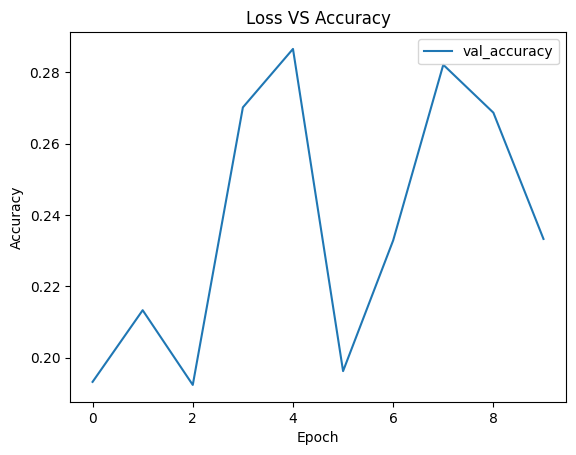

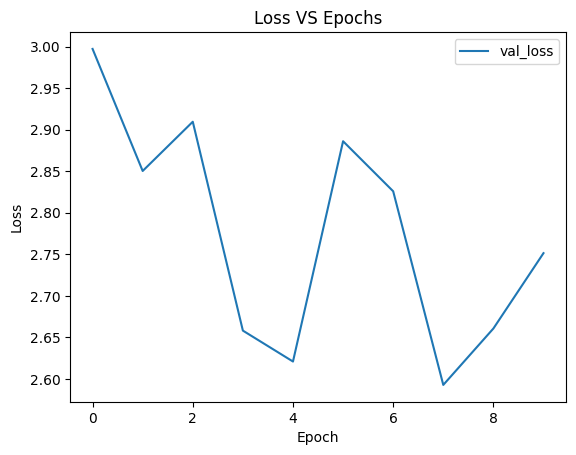

In [21]:
import matplotlib.pyplot as plt
#Accuracy
plt.figure()
#plt.plot(history.history['train_accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Loss VS Accuracy')

#Loss
plt.figure()
#plt.plot(history.history['train_loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss VS Epochs')
